In [3]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf
import scipy.stats as stats

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

from shapely.geometry import Point, MultiPolygon

import warnings
warnings.filterwarnings('ignore')

In [21]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil')
INFO = pd.read_csv(os.path.join(dir_base,'OBS_CPTEC','INFO_final.csv'))

# Test filter
INFO = INFO[INFO.Mean<13]

INFO.head(3)

,File,Lat,Lon,Alt,Max,Mean
0,obs_cptec_02042051.csv,-20.98,-42.51,0.0,147.8,4.48
1,obs_cptec_02142096.csv,-21.07,-42.64,0.0,119.4,4.38
2,obs_cptec_10100000.csv,-4.23,-69.94,0.0,137.4,8.17


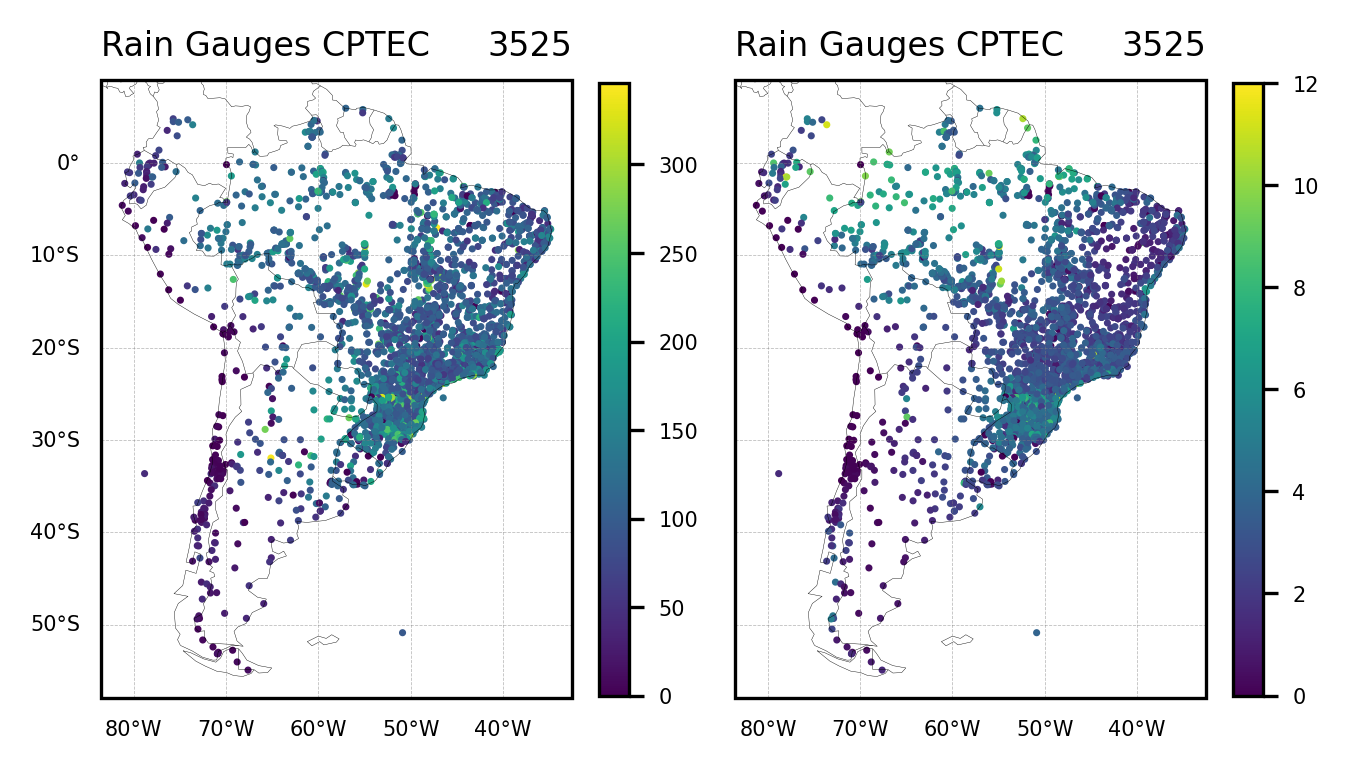

In [22]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(5,4),dpi=300)
gs = gridspec.GridSpec(1,2)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

a1 = ax1.scatter(INFO.Lon,INFO.Lat,s=0.5,marker='o',c=INFO.Max)
cbar = plt.colorbar(a1, fraction=0.058)
cbar.ax.tick_params(labelsize=5)

ax1.set_title('Rain Gauges CPTEC', fontsize=8, loc='left')
ax1.set_title(len(INFO), fontsize=8, loc='right')

#==================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

a1 = ax1.scatter(INFO.Lon,INFO.Lat,s=0.5,marker='o',c=INFO.Mean)
cbar = plt.colorbar(a1, fraction=0.058)
cbar.ax.tick_params(labelsize=5)

ax1.set_title('Rain Gauges CPTEC', fontsize=8, loc='left')
ax1.set_title(len(INFO), fontsize=8, loc='right')

#==================================================================================================
ax1.set_facecolor('white')
fig.patch.set_alpha(0)

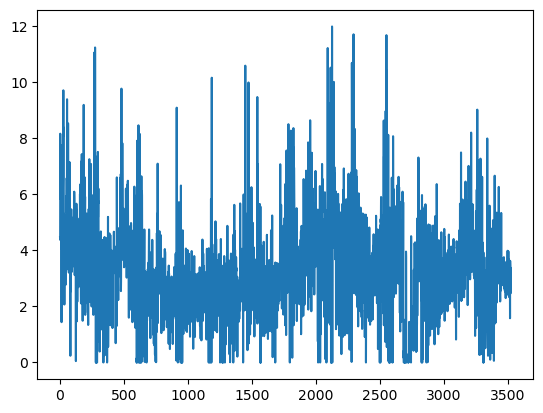

In [25]:
plt.plot(INFO.Mean.values)